# Noções de Estatística/Matemática

## Algebra Linear



## Estatística


A Estatística nos dá ferramentas para descrever uma séria de dados, e extrair informações relevantes dele.

Aqui apresentamos uma introdução/revisão de alguns conceitos que serão usados mais tarde, quando elaborarmos os modelos de previsão

### Tendências centrais

Dada uma distribuição, nos dão noção de onde está o centro dos elementos

#### Média

Provavelmente o mais comum de todos, definido como a soma dos elementos sobre a quantidade de elementos, normalmente denotado com uma barra.

$$\bar{k} = \frac{\sum_{i=1}^{N}k_i}{N}$$

Nota: a média de uma distribuição é o valor que minimiza a soma das distâncias quadradas entre seus elementos: $\sum_{i=1}^{N}(x-k_i)^2$

#### Mediana

É o valor médio dos elementos da distribuição, ou a média dos dois valores mais centrais, no caso de número par de elementos.

Por exemplo: k = [1,2,3,6,7,8,10] $\to$ mediana(k)=6

Nota: é o valor que minimiza a soma dos módulos das distâncias entre seus elementos: $\sum_{i=1}^{N}|x-k_i|$

#### Quantil

Generalização da mediana, representa o valor abaixo do qual está um determinado percentual dos dados

- quantil(100%) = máximo
- quantil(0%) = mínimo
- quantil(50%) = mediana

In [1]:
k = [1,2,3,6,7,8,10]
import numpy as np

print("media:", np.mean(k))
print("mediana:", np.median(k))
print("max:", np.max(k))
print("min:", np.min(k))
print("q0:", np.percentile(k, 0))
print("q1:", np.percentile(k,100))

media: 5.285714285714286
mediana: 6.0
max: 10
min: 1
q0: 1.0
q1: 10.0


### Dispersões

Ao contrário das tendências centrais, que nos dizem onde os valores estão centratos, as medidas de dispersão nos informam o quão espalhados eles estão. Comumente temos '0' para concentrados em um ponto, aumentando de acordo com o quão dispersos estiverem

#### Intervalo de variação

É o menor intervalo que compreende todos os valores do conjunto de dados, a variação entre o valor máximo e o mínimo.

$$IV = max(k) - min(k)$$

#### Variância e desvio padrão

A variância pode ser entendida algo como a média das distâncias quadráticas até a média.

Para a população total: $$\sigma^2 = \frac{\sum_{i=1}^{N} (k_i - \mu)^2}{N}$$
Para uma amostra: $$\hat{\sigma}^2 = \frac{\sum_{i=1}^{N} (k_i - \bar{k})^2}{N-1}$$

Como a variância acaba por ter a dimensão de $unid.^2$, sendo $unid.$ a unidade dos dados, é comum usarmos a definição de desvio padrão: 

$$std = \sqrt{\sigma^2}$$

#### Intervalo interquartil

Intervalo entre o quantil 25% e o quantil 75%

$$IQ = q_{75\%}(k)-q_{25\%}(k)$$

Ao contrário da variância, o intervalo interquartil é relativamente robusto à presença de *outliers* nos dados 

### Correlação

Pode-se ainda estimar a relação entre diferentes aspectos dos elementos da base de dados. Por exemplo, o quão relacionado está o tamanho de um apartamento com o seu preço de venda.

Para isso vejamos primeiro a covariância

#### Covariância

Analogamente à variância, que mede o desvio dos pontos de uma variável em relação a sua média, a covareância mensura esse desvio em duas variáveis, lado a lado.

Por fórmula temos: $$cov(x,y) = \frac{\sum_{i=1}^{N} (x-\bar{x})(y-\bar{y})}{N-1}$$

- difícil compreensão do significado pela unidade [x][y]
- problema com as diferentes escalas utilizadas

#### Correlação

Correlação, por sua vez é uma adimensionalização da covariância, dividindo-a pelos desvios-padrão das variáveis.

Temos então: $$corr(x,y) = \frac{cov(x,y)}{std_x std_y}$$

Nota: falta de *correlação* não quer dizer falta de *relação*, apenas que ela não é linear 

##### Causa e correlação

![Statistics](stat_corr_caus.png)

### Probabilidade

Probabilidade é um modelo matemático para a *ignorância*.

Pode ser entendida de forma mais objetiva, como a razão entre o número de eventos bem sucedidos e o número total de eventos possíveis, ou, mais subjetivamente, como o grau de confiança de que o evento será bem sucedido.

Usando a convenção, denotamos $P(A)$ para a probabilidade de $A$ acontecer

#### Probabilidade Condicional e Independência

Qual é a probabilidade de $A$ ocorrer, sabendo que $B$? Denotamos $P(A|B)$

$$P(A|B) = \frac{P(A\hspace{1mm}e\hspace{1mm}B)}{P(B)}$$

De onde tiramos que $P(A\hspace{1mm}e\hspace{1mm}B) = P(A|B)P(B) = P(B|A)P(A)$.

Dizemos que dois eventos são independentes se o fato de $A$ ocorrer não mudar nossa informação sobre a probabilidade de $B$.

Logo, para eventos independentes:

$$P(A\hspace{1mm}e\hspace{1mm}B) = P(A)P(B)$$

##### Teorema de Bayes

Elaborando o resultado da probabilidade condicional, chegamos à seguinte fórmula:


$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

A forma simples do **Teorema de Bayes**

Com isso, conseguimos refinar nosso conhecimento sobre $P(A)$ - a probabilidade *a priori* - com base na relação de $A$ e um evento ocorrido $B$, chegando à probabilidade *a posteriori* $P(A|B)$.

Em *Machine Learning*, podemos utilizar esses resultados em modelos de classificação, como o **Naïve Bayes**

### Distribuições 

A variável aleatória $x$ tem a ela associada uma distribuição que indica a probabilidade $p$ de que cada um dos valores possíveis de $x$ ocorra.

A distribução pode ser discreta, como no lançar de uma moeda: {cara: 1/2, coroa: 1/2}, ou contínua, como a distância que um aviãozinho de papel voará ao ser lançado.

No caso de ser contínua, costumamos descrevê-la através de uma **função de densidade de probabilidade (fdp) $f(x)$**, de forma que $\int_{a}^{b} f(x)dx$ é a probabilidade de $x$ estar entre $a$ e $b$.

De forma mais simples, para $h$ uma distância bem pequena, a chance de $x$ estar entre $k$ e $k\hspace{1mm}$+$\hspace{1mm}h$ é $f(k)\hspace{1mm}h$ 

#### Binomial

É uma distribuição para o número de sucessos ao se repetir $n$ vezes um experimento com probabilidade $p$ de sucesso. 

- $\mu = np$
- $\sigma^2 = np(1-p)$
- $f(k) = \binom{n}{k}p^k(1-p)^{n-k}$

#### Uniforme

$X\sim \mathcal{U}(a,b)$ ser uma ditribuição uniforme significa que $x$ tem a mesma probabilidade de ser qualquer valor entre $a$ e $b$.

- $\mu = \frac{a+b}{2}$
- $\sigma^2 = \frac{(b-a)^2}{12}$
- $f(x) = \frac{1}{(b-a)},\hspace{1mm}a \le x\le b$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def uniforme_fdp(x, a=0, b=1):
    f = []
    for k in x:
        if k<a or k>b:
            f.append(0)
        else:
            f.append(1/(b-a))
    return f

média real: 5.00 
média estimada: 5.04
desvio real: 2.887 
desvio estimado: 2.931


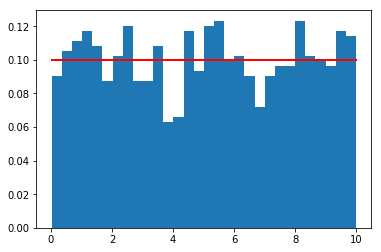

In [4]:
a, b = 0, 10 # definindo parâmetros

un = np.random.uniform(a,b, 1000) # colhendo amostras

print("média real: %.2f" % ((a+b)/2), "\nmédia estimada: %.2f" % np.mean(un))
print("desvio real: %.3f" % (np.sqrt((b-a)**2/12)), "\ndesvio estimado: %.3f" % np.std(un))

count, bins, ignored = plt.hist(un, 30, density=True) # plotando histograma das variáveis
plt.plot(bins, uniforme_fdp(x=bins, a=a, b=b), linewidth=2, color='r') # plotando dist. uniforme 
plt.show()

#### Normal

Formalmente, o teorema do limite central afirma que, sendo $x$ a variável aleatória definida como a média entre $m$ amostras de outra distribuição $K$ qualquer, $x$ é normalmente distribuída para um $m$ suficientemente grande, com média $\mu$ e variância $\sigma^2/m$

Apesar da formulação estranha, é um resultado recorrente nos processos comuns do dia-a-dia, e muita coisa é modelada como sendo aproximadamente normal, ainda que não exatamente.

$$f(x) = \frac{1}{\sqrt{2\pi}\hspace{1mm}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [5]:
def normal_fdp(x, mu=0, sigma=1):
    return (np.exp(-(x-mu)**2 /2 /sigma**2) /(np.sqrt(2 * np.pi)*sigma))

média estimada: 0.001
desvio padrão estimado: 0.100 


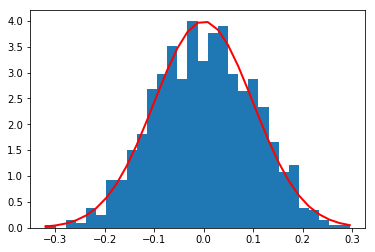

In [6]:
mu, sigma = 0, 0.1 # média e desvio padrão

s = np.random.normal(mu, sigma, 1000) # colhendo amostras

print("média estimada: %.3f" % np.mean(s))
print("desvio padrão estimado: %.3f " % np.std(s))


count, bins, ignored = plt.hist(s, 30, density=True) # plotando histograma das variáveis
plt.plot(bins, normal_fdp(x=bins, mu=mu, sigma=sigma), linewidth=2, color='r') # plotando normal 
plt.show()

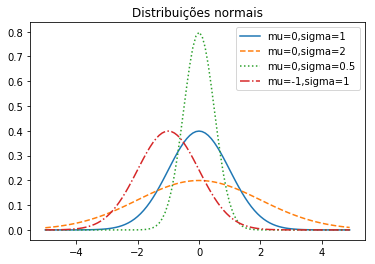

In [7]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_fdp(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_fdp(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_fdp(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_fdp(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Distribuições normais")
plt.show()

média normal:  5.0 
média distribuição: 4.98
desvio normal:  0.5 
desvio distribuição: 0.514


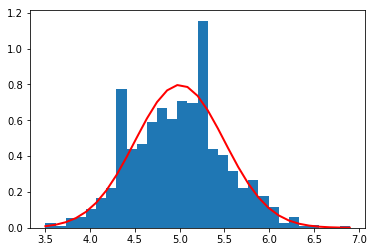

In [8]:
## teorema do limite central

n = 10
p = 0.5
m = 10

b = np.random.binomial(n, p, (1000,m))
tlc = b.mean(axis=1)

mu = n*p
sigma = np.sqrt((n*p*(1-p))/m)

print("média normal: ", mu, "\nmédia distribuição: %.2f" % np.mean(tlc) )
print("desvio normal: ", sigma, "\ndesvio distribuição: %.3f" % np.std(tlc))

count, bins, ignored = plt.hist(tlc, 30, density=True) # plotando histograma das variáveis
plt.plot(bins, normal_fdp(x=bins, mu=mu, sigma=sigma), linewidth=2, color='r') # plotando normal 
plt.show()

### Teste de hipóteses

Mas para que serve tudo isso? Como usamos a estatística para tomar decisões? Uma maneira simples é através do teste de hipóteses.

Seguimos os passos:
- Definimos uma hipótese nula $H_0$, cuja veracidade queremos testar
- Escolhemos a distribuição adequada, e quais seriam seus valores se $H_0$ fosse verdade
- Escolhemos o grau de significância que consideraremos - o quanto as observações deveram desviar da distribuição de $H_0$
- Colhemos dados e confrontamos com o grau de significância


#### Exemplo

Dada uma moeda, queremos testar se ela é justa - não viciada - ou não.

- $H_0$: a moeda é justa $\to$ probabilidade de dar cara $p$ = 0.5
- Para n=1000 jogos consecutivos de moeda, podemos aproximar o resultado numa normal $\mathcal{N}\left(\mu = np,\hspace{1mm}\sigma^2 = np(1-p)\right)$
- Comumente se escolhe o grau de significância como 10% ou 5%. Escolhemos 5%.
- Jogamos a moeda 1000 vezes. Considerando cara=1 e coroa=0, encontramos a média $\bar{x}_{obs}$ dessa amostra.
- Se o valor de $\bar{x}_{obs}$ estiver entre os 2,5% maiores ou menores para a distribuição de $H_0$ - 5% de significância-, descartamos a hipótese.

### Intervalo de confiança

Todos já ouvimos falar de intervalo de confiança, como em resultados de pesquisas. O que devemos entender ao ouvir um IC de 95%, por exemplo?

É um caminho análogo ao utilizado no teste de hipóteses, mas tendo os resultados experimentais como referência.

- Estimamos a distribuição através dos dados observados, e sua média $\mu$ e desvio-padrão $\sigma$.
- Achamos, para o IC de x% com base nessa distribuição, o intervalo que compreende x% dos resultados possíveis, simetricamente à média.

#### Interpretação.

Dizer que um intervalo de confiança é de 90% é o mesmo que dizer que, ao se repetir o experimento, em 90% das vezes o valor real da média estará dentro daquele intervalo.

![IC](ic95.png)